In [153]:
import json # we need to use the JSON package to load the data, since the data is stored in JSON format
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [123]:
with open("proj1_data.json") as fp:
    data = json.load(fp)

In [124]:
# Lowers every word's text, and split
for data_point in data:
    data_point["text"] = data_point["text"].lower().split()

In [125]:
# Sets Traning, Validation, Test sets
training_set = data[:10000]
validation_set = data[10000:11000]
test_set = data[11000:]

In [126]:
# Finds words recurring number
words_recurrence = {}
for data_point in training_set:
    for word in data_point["text"]:
        if word in words_recurrence:
            words_recurrence[word] += 1
        else:
            words_recurrence[word] = 1

In [127]:
# Sorts from high to low amd trim to size 160 
words_recurrence = sorted(words_recurrence.items(), key=lambda kv: kv[1], reverse=True)
del words_recurrence[160:]

In [128]:
# The 160 most frequently occurring words (from 0 to 159)
# Builds vector w
w = {}
i = 0
for word in words_recurrence:
    w[word[0]] = i
    i += 1

In [129]:
# Builds matrix x
x = np.zeros((12000, 160))
i = 0
for data_point in data:
    for word in data_point["text"]:
        if word in w:
            x[i, w[word]] += 1
    i += 1

In [130]:
# Splits y into Traning, Validation, Test vectors
x_training = x[:10000]
x_validation = x[10000:11000]
x_test = x[11000:]

In [131]:
# Builds vector y
y = np.zeros(12000)
i = 0
for data_point in data:
    y[i] = data_point["popularity_score"]
    i += 1

In [132]:
# Splits y into Traning, Validation, Test vectors
y_training = y[:10000]
y_validation = y[10000:11000]
y_test = y[11000:]

In [133]:
def add_bias(x_dataset):
    x_dataset_bias = np.ones((x_dataset.shape[0], x_dataset.shape[1]+1))
    x_dataset_bias[:,:-1] = x_dataset
    return x_dataset_bias

In [134]:
# Closed-form solution

In [135]:
weights_closed = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(add_bias(x_training)), add_bias(x_training))), np.transpose(add_bias(x_training))), y_training)
estimation_closed = np.dot(add_bias(x_validation), weights_closed)

In [154]:
# Mean-square error
def ms_err(predict, true):
    return (np.square(predict - true).mean(axis=None))
print(ms_err(estimation_closed, y_validation))
print(mean_squared_error(estimation_closed, y_validation))

1.4342858175678814
1.4342858175678814


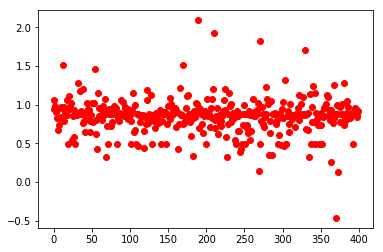

In [137]:
estimation_closed = estimation_closed[400:800]
plt.plot(estimation_closed, 'ro')
plt.show()

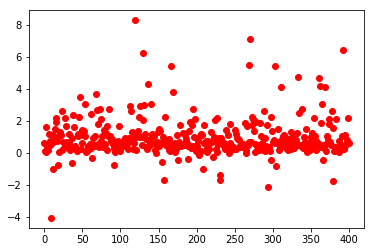

In [138]:
y_validation = y_validation[400:800]
plt.plot( y_validation, 'ro')
plt.show()

In [139]:
# Gradient descent

In [144]:
def gradient_descent(x, y, beta, n0, eps):
    i = 1
    weight = np.random.rand(x.shape[1])
    a1 = np.transpose(x) @ x
    a2 = np.transpose(x) @ y
    while True:
        alpha = n0/((1+beta*i) * 10000)
        weight_new = weight - 2*alpha * (a1@weight - a2)
        difference = np.linalg.norm(weight_new - weight, ord=2)
        weight = weight_new
        i += 1           
        #plt.plot(i, difference, 'ro')
        #if(i % 1000 == 0):
         #   print("Iteration: " + str(i) + ". Difference: " + str(difference))
        if (difference < eps):
            print(difference)
            break
    return weight

In [145]:
weights_gradient = gradient_descent(add_bias(x_training), y_training, beta=10e-3, n0=10e-3, eps= 1 * 10e-07)

9.999992378176704e-07


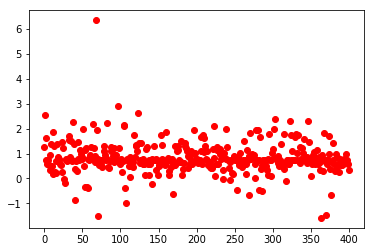

1.717306075838447


In [146]:
estimation_gradient = np.dot(add_bias(x_validation), weights_gradient)
estimation_gradient = estimation_gradient[400:800]
plt.plot(estimation_gradient, 'ro')
plt.show()
print(ms_err(estimation_gradient, y_validation))